In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('spaceship_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


<AxesSubplot:>

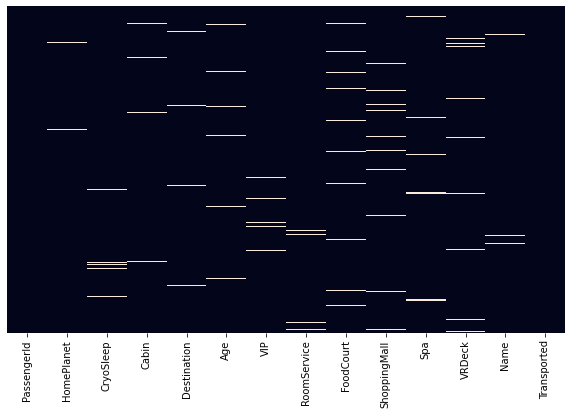

In [5]:
# checking sparsity of null values 
plt.figure(figsize = (10,6))
sns.heatmap(df.isna(), yticklabels = False, cbar = False )

<AxesSubplot:>

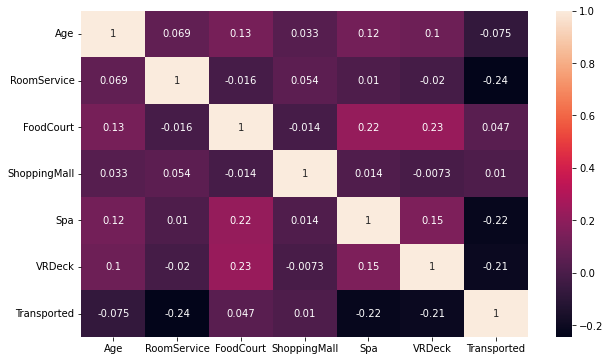

In [6]:
# checking the correlation of columns 
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(), annot = True)

 name - not useful in anyway 

passenger_id - some sort of index, appears irrelevant at first glance but there's some correlation between the groups and the target variable

cabin seems to be useless at first glance but with feature engineering , might be able to extract useful data 


In [7]:
df.isna().value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name   Transported
False        False       False      False  False        False  False  False        False      False         False  False   False  False          6606
                         True       False  False        False  False  False        False      False         False  False   False  False           167
                         False      False  False        False  True   False        False      False         False  False   False  False           165
                                                               False  False        False      True          False  False   False  False           164
             True        False      False  False        False  False  False        False      False         False  False   False  False           163
                                                                                                            

of 8692 data entries, 6606 have no null values for all features 

it is safe to drop null rows since we cannot pick random values for cryosleep,destination and vip because they affect the target 

In [8]:
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [10]:
df.isnull().value_counts()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age    VIP    RoomService  FoodCourt  ShoppingMall  Spa    VRDeck  Name   Transported
False        False       False      False  False        False  False  False        False      False         False  False   False  False          6606
dtype: int64

In [11]:
# to drop the irrelevant columns 
df.drop('Name', axis = 1 ,inplace =  True)

In [12]:
# extracting the group numbers from the passengerid 
df['Passenger'] = [i.split('_') for i in df['PassengerId']]

In [13]:
df['Passenger'] = [j[0] for j in df['Passenger']]
df['Passenger']

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Passenger, Length: 6606, dtype: object

In [14]:
# feature extraction for Cabin column , the deck and and side 
df['Cabins'] = [c.split('/') for c in df['Cabin']]
df['Cabins'] = [d[0] + d[-1] for d in df['Cabin']]
df['Cabins']

0       BP
1       FS
2       AS
3       AS
4       FS
        ..
8688    AP
8689    GS
8690    GS
8691    ES
8692    ES
Name: Cabins, Length: 6606, dtype: object

In [15]:
df['Cabins'].value_counts()

FP    1104
FS    1048
GP     989
GS     984
ES     353
BS     342
EP     330
CS     325
BP     286
CP     262
DP     196
DS     178
AS     115
AP      92
TP       2
Name: Cabins, dtype: int64

In [16]:
df.drop('Cabin', axis = 1 , inplace = True)

In [17]:
df = df.reset_index(drop = True)

In [18]:
df.drop('PassengerId', axis = 1 , inplace = True)

In [19]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Cabins
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,BP
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,FS
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,AS
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,AS
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,FS


In [20]:
df['CryoSleep'] = pd.get_dummies(df['CryoSleep'], drop_first = True)


In [21]:
df['VIP'] = pd.get_dummies(df['VIP'], drop_first = True)

In [22]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Cabins
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,BP
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,FS
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,AS
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,AS
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,FS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,9276,AP
6602,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,False,9278,GS
6603,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,9279,GS
6604,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,9280,ES


In [23]:
df['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [24]:
df[['Home_europa', 'Home_mars']] = pd.get_dummies(df['HomePlanet'], drop_first = True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Cabins,Home_europa,Home_mars
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,BP,1,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,FS,0,0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,AS,1,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,AS,1,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,FS,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,9276,AP,1,0
6602,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,False,9278,GS,0,0
6603,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,9279,GS,0,0
6604,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,9280,ES,1,0


In [25]:
df.drop('HomePlanet' , axis = 1 , inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6606 entries, 0 to 6605
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     6606 non-null   uint8  
 1   Destination   6606 non-null   object 
 2   Age           6606 non-null   float64
 3   VIP           6606 non-null   uint8  
 4   RoomService   6606 non-null   float64
 5   FoodCourt     6606 non-null   float64
 6   ShoppingMall  6606 non-null   float64
 7   Spa           6606 non-null   float64
 8   VRDeck        6606 non-null   float64
 9   Transported   6606 non-null   bool   
 10  Passenger     6606 non-null   object 
 11  Cabins        6606 non-null   object 
 12  Home_europa   6606 non-null   uint8  
 13  Home_mars     6606 non-null   uint8  
dtypes: bool(1), float64(6), object(3), uint8(4)
memory usage: 496.9+ KB


In [27]:
df['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [28]:
df[['Destination_55 Cancri e', 'Destination_P50 J318.5-22']] = pd.get_dummies(df['Destination'], drop_first = True)

In [29]:
df.drop('Destination', axis = 1, inplace = True)

In [30]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Cabins,Home_europa,Home_mars,Destination_55 Cancri e,Destination_P50 J318.5-22
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,BP,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,FS,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,AS,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,AS,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,FS,0,0,0,1


In [31]:
# checking the bottom of the bucket_list variables of df['Cabin']
for c in df['Cabins']:
    if c == 'TP': 
        print(df.loc[df['Cabins'] == 'TP'])

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
1680          0  42.0    0          0.0     1829.0           2.0  3133.0   
2061          0  38.0    0          0.0     3135.0           0.0    26.0   

      VRDeck  Transported Passenger Cabins  Home_europa  Home_mars  \
1680  2447.0        False      2414     TP            1          0   
2061     3.0         True      2971     TP            1          0   

      Destination_55 Cancri e  Destination_P50 J318.5-22  
1680                        0                          1  
2061                        0                          1  
      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
1680          0  42.0    0          0.0     1829.0           2.0  3133.0   
2061          0  38.0    0          0.0     3135.0           0.0    26.0   

      VRDeck  Transported Passenger Cabins  Home_europa  Home_mars  \
1680  2447.0        False      2414     TP            1          0   
2061     3.0  

both entries were going from europa to Trappist- 1e , a very close age range , both didn't take the cryosleep program , one seemed to be an extravagant spend and was not transported...lol

In [32]:
# to manually encode the Cabins column cause it has so many variables and we don't want hierarchy with label encoding , we'll be creating a dictionary
dict1 = {'FP' : 1 ,'FS'  : 2 , 'GP'  : 3 ,'GS'  : 4 ,'ES'  : 5 , 'BS'  : 6 ,  'EP'  : 7 ,'BP'  : 8 ,'CP'  : 9 ,'DP'  : 10,'DS'  : 11,'AS'  : 12, 'AP'  : 13,  'TP'  : 14 }

In [33]:
df['Cabin'] = df.Cabins.map(dict1)

In [34]:
df['Cabin'].value_counts()

1.0     1104
2.0     1048
3.0      989
4.0      984
5.0      353
6.0      342
7.0      330
8.0      286
9.0      262
10.0     196
11.0     178
12.0     115
13.0      92
14.0       2
Name: Cabin, dtype: int64

In [35]:
df.drop('Cabins', axis = 1 , inplace = True)

In [36]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Home_europa,Home_mars,Destination_55 Cancri e,Destination_P50 J318.5-22,Cabin
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,1,0,0,1,8.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,0,0,0,1,2.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,1,0,0,1,12.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,1,0,0,1,12.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,0,0,0,1,2.0


<AxesSubplot:xlabel='Transported', ylabel='count'>

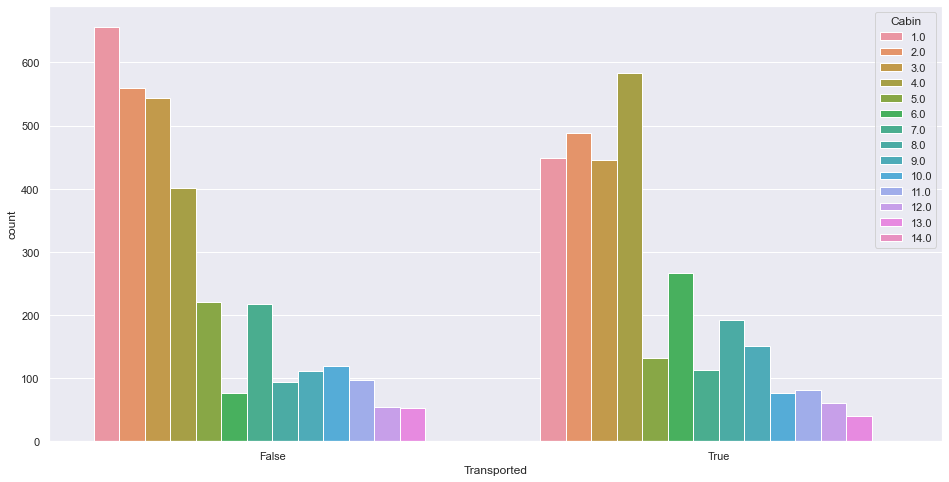

In [37]:
sns.set_theme()
plt.figure(figsize = (16,8))
sns.countplot(x = 'Transported', hue = "Cabin", data = df)

In [38]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger,Home_europa,Home_mars,Destination_55 Cancri e,Destination_P50 J318.5-22,Cabin
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,1,0,0,1,8.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,0,0,0,1,2.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,1,0,0,1,12.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,1,0,0,1,12.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,0,0,0,1,2.0


<AxesSubplot:>

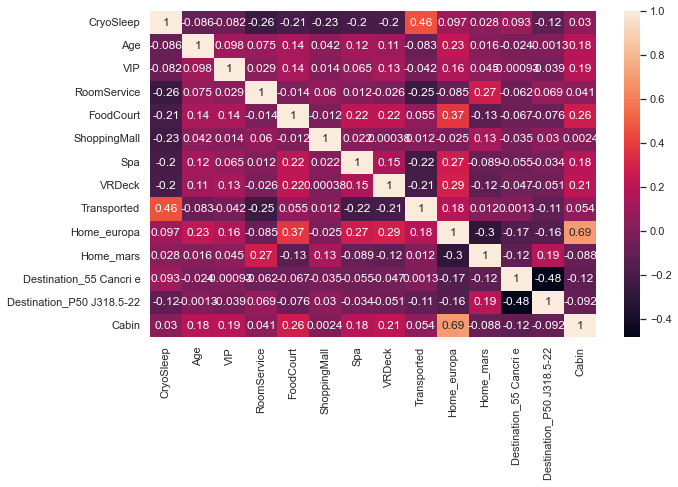

In [39]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

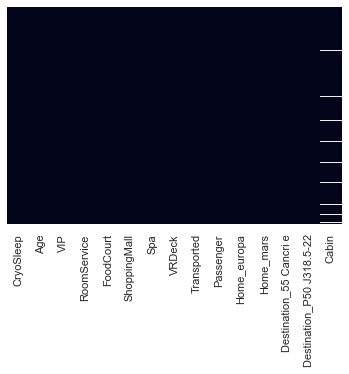

In [40]:
sns.heatmap(df.isnull(), cbar = False, yticklabels = False)

<AxesSubplot:>

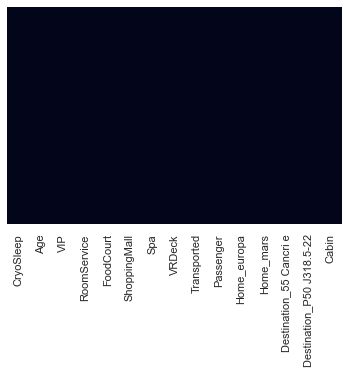

In [41]:
df.dropna(inplace = True)
sns.heatmap(df.isnull(), cbar = False, yticklabels = False)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split 

In [43]:
X = df.drop('Transported', axis = 1 )
y = df['Transported']

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 2)
param_grid1 = [
    { 'n_estimators' : [8,10,15,20],
     'max_features' : ['auto' , 'sqrt' , 'log2'],
     'max_depth' : [6],
     'min_samples_split' : [2,5],
     'min_samples_leaf': [1,4],
     'min_weight_fraction_leaf' : np.log(range(1,5))
    }
]
cff = GridSearchCV(rf, param_grid= param_grid1 , cv = 5 , verbose = 2 ,n_jobs = 4 )
cff.fit(X_train , y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\HP\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.78025252 0.77607064 0.77945412 0.78184238        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.7738808  0.77646826
 0.78044875 0.78164377        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.78224178 0.78005094 0.78204119 0.78323581
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.78224178 0.78005094 0.78204119 0.78323581        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.78025252 0.77607064
 0.77945412 0.78184238        nan        nan        nan        nan
        nan        nan        nan        nan        nan  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=4,
             param_grid=[{'max_depth': [6],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 4],
                          'min_samples_split': [2, 5],
                          'min_weight_fraction_leaf': array([0.        , 0.69314718, 1.09861229, 1.38629436]),
                          'n_estimators': [8, 10, 15, 20]}],
             verbose=2)

In [48]:
dfx = cff.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(dfx, y_test), '\n',confusion_matrix(dfx,y_test) )

              precision    recall  f1-score   support

       False       0.79      0.76      0.78       660
        True       0.75      0.78      0.76       597

    accuracy                           0.77      1257
   macro avg       0.77      0.77      0.77      1257
weighted avg       0.77      0.77      0.77      1257
 
 [[503 157]
 [133 464]]


In [49]:
dff = pd.DataFrame(cff.cv_results_)

In [50]:
print(cff.best_params_)
print('\n')
cff.best_score_

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20}




0.7832358129670373

In [51]:
rfc = RandomForestClassifier(random_state = 2, n_estimators = 32 )
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(pred, y_test), '\n',confusion_matrix(pred,y_test) )

              precision    recall  f1-score   support

       False       0.85      0.75      0.80       720
        True       0.71      0.83      0.77       537

    accuracy                           0.79      1257
   macro avg       0.78      0.79      0.78      1257
weighted avg       0.79      0.79      0.79      1257
 
 [[543 177]
 [ 93 444]]


In [52]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(random_state = 42 )

In [53]:
param_grid1 = [
    {  'criterion' : ['gini', 'entropy'],
       'splitter' : ['best', 'random'],
       'min_samples_split' : [2, 10 , 15,20],
       'min_samples_leaf' : [1,3,6,7],
    }
]
clf = GridSearchCV(dc, param_grid= param_grid1 , cv = 5 , verbose = 2 ,n_jobs = 4 )
ddc = clf.fit(X_train , y_train)
print(clf.best_params_)
print('\n')
print(clf.best_score_)
ddc = clf.predict(X_test)
print(classification_report(ddc, y_test), '\n',confusion_matrix(ddc,y_test) )

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 15, 'splitter': 'random'}


0.7794590791064597
              precision    recall  f1-score   support

       False       0.80      0.74      0.77       687
        True       0.71      0.77      0.74       570

    accuracy                           0.75      1257
   macro avg       0.75      0.76      0.75      1257
weighted avg       0.76      0.75      0.75      1257
 
 [[507 180]
 [129 441]]


In [54]:
dc = DecisionTreeClassifier(random_state = 42, criterion = 'gini' , min_samples_leaf = 7 , min_samples_split = 15 , splitter = 'random' )
dc.fit(X_train, y_train)
ddc = dc.predict(X_test)
print(classification_report(ddc, y_test), '\n',confusion_matrix(ddc,y_test) )

              precision    recall  f1-score   support

       False       0.83      0.77      0.80       687
        True       0.74      0.81      0.77       570

    accuracy                           0.79      1257
   macro avg       0.79      0.79      0.79      1257
weighted avg       0.79      0.79      0.79      1257
 
 [[527 160]
 [109 461]]


In [55]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42)
param_grid  = [
    {'penalty':['l1', 'l2' , 'elasticnet' , 'none'],
     'C' : np.logspace(-1, -5, 1 ),
     'solver': ['lbfgs' , 'newton-cg', 'liblinear' , 'sag' , 'saga'],
     'max_iter' : [10, 20 , 30]
    }
]

In [56]:
lrg = GridSearchCV(lg, param_grid= param_grid , cv = 5 , verbose = 2 ,n_jobs = 4 )
lrg.fit(X_train , y_train)
print(lrg.best_params_)
print('\n')
print(lrg.best_score_)
h = lrg.predict(X_test)
print(classification_report(h, y_test), '\n',confusion_matrix(h,y_test) )

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.1, 'max_iter': 10, 'penalty': 'none', 'solver': 'newton-cg'}


0.7927894392578938
              precision    recall  f1-score   support

       False       0.76      0.78      0.77       619
        True       0.78      0.76      0.77       638

    accuracy                           0.77      1257
   macro avg       0.77      0.77      0.77      1257
weighted avg       0.77      0.77      0.77      1257
 
 [[483 136]
 [153 485]]


C:\Users\HP\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78960457        nan 0.7868181  0.78821173
 0.78841074 0.78841074 0.78841034 0.78522586        nan        nan
        nan        nan        nan 0.79179402 0.79278944        nan
 0.7913964  0.79000297        nan        nan 0.79020158        nan
 0.78920616 0.78841074 0.78841074 0.78841074 0.78841074 0.78801273
        nan        nan        nan        nan        nan 0.79259043
 0.79259043        nan 0.79239143 0.7907984         nan        nan
 0.79020158        nan 0.78880835 0.78841074 0.78841074 0.78841074
 0.78841074 0.78841074        nan        nan        nan        nan
        nan 0.79259043 0.79259043        nan 0.79278944 0.79159541]
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(

In [57]:
lrg.best_estimator_

LogisticRegression(C=0.1, max_iter=10, penalty='none', random_state=42,
                   solver='newton-cg')

In [58]:
lg = pd.DataFrame(lrg.cv_results_)
lg[['param_C','param_max_iter', 'param_penalty','param_solver', 'mean_test_score', 'rank_test_score']]

,param_C,param_max_iter,param_penalty,param_solver,mean_test_score,rank_test_score
0,0.1,10,l1,lbfgs,NaN,60
1,0.1,10,l1,newton-cg,NaN,36
2,0.1,10,l1,liblinear,0.789605,15
3,0.1,10,l1,sag,NaN,37
4,0.1,10,l1,saga,0.786818,32
5,0.1,10,l2,lbfgs,0.788212,30
6,0.1,10,l2,newton-cg,0.788411,18
7,0.1,10,l2,liblinear,0.788411,18
8,0.1,10,l2,sag,0.788410,29
9,0.1,10,l2,saga,0.785226,33


In [59]:
lrx = LogisticRegression(random_state = 42, C = 0.2 , max_iter = 10 , solver = 'newton-cg' , penalty = 'none' )
lrx.fit(X_train,y_train)
predl = lrx.predict(X_test)
print(classification_report(predl, y_test), '\n',confusion_matrix(predl,y_test) )

              precision    recall  f1-score   support

       False       0.76      0.78      0.77       619
        True       0.78      0.76      0.77       638

    accuracy                           0.77      1257
   macro avg       0.77      0.77      0.77      1257
weighted avg       0.77      0.77      0.77      1257
 
 [[483 136]
 [153 485]]


C:\Users\HP\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
